### Import required libraries

In [1]:
# Libraries to process file and visualization for EDA
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier detection 
from scipy.stats import zscore

%matplotlib inline
sns.set(style='white', context='notebook')

In [2]:
# Get current working directory
# print(os.getcwd())
# Change current working directory pointing to dataset
# os.chdir(r"../data/project/regression")

### Import Dataset

In [3]:
# Import dataset file and get panda dataframe. Also copy original dataframe to future reference.
dataset = pd.read_csv(r"USA_Housing.csv")
dataset_original = dataset

In [4]:
# Check few columns and related data values 
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Check all available columns
dataset.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
# Check all column datatypes also observe Non-Null values
dataset.info()

# Observation : There are total 5000 records available. 
    # Other than 'Address' column all columns are numerical having datatype float64
    # and We can see there are some missing values Avg. Area Income, Avg. Area Number of Rooms and 
# Avg. Area Number of Bedrooms columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
# Drop unnecessary feature(s)
# dataset = dataset.iloc[:, 0:6]
dataset = dataset.drop(columns=['Address'], axis=1) 

### Checking missing values

In [10]:
# Get total missing values and it's percentages
total_missing = dataset.isnull().sum()
percentage_missing = total_missing * 100 / len(dataset)
missing_value_df = pd.DataFrame(data=[total_missing, percentage_missing], index=["Total", "%"]).T
missing_value_df

# Observation : Here we do have missing values in dataset but no colum have missing values 25% or greater so no need to 
# drop any column but we will do imputation.

# In imputation if variable is char then we will use mode function and if it is numeric then we will first check for
# outrliers if there are outrliers then we will impute by median else we will impute using mean

,Total,%
Avg. Area Income,0.0,0.0
Avg. Area House Age,0.0,0.0
Avg. Area Number of Rooms,0.0,0.0
Avg. Area Number of Bedrooms,0.0,0.0
Area Population,0.0,0.0
Price,0.0,0.0


In [11]:
# If MEAN and MEDIAN difference is more than 10% then there are possible outliers present in data.
dataset.describe().T

# Observation : As there is not much MEAN and MEDIAN difference for each column so there are less or no outliers

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


### Univirate Analysis

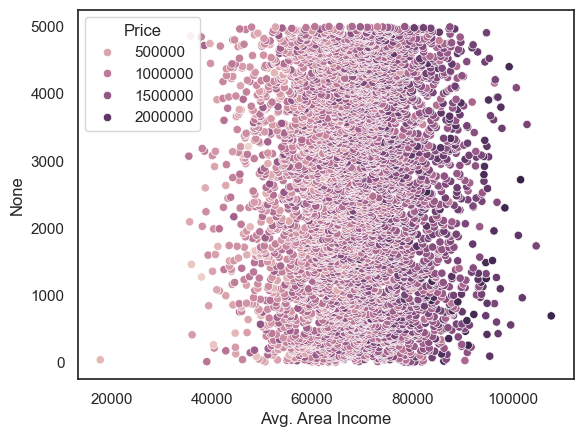

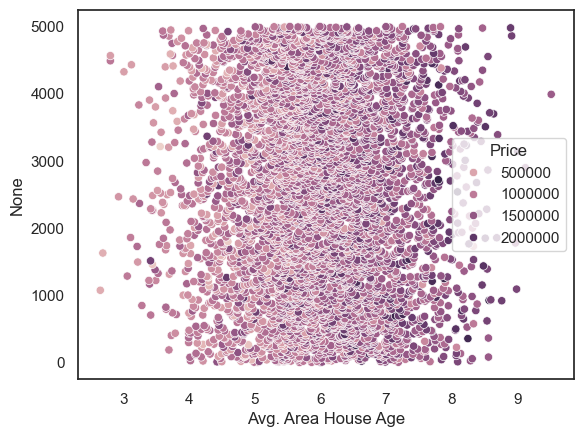

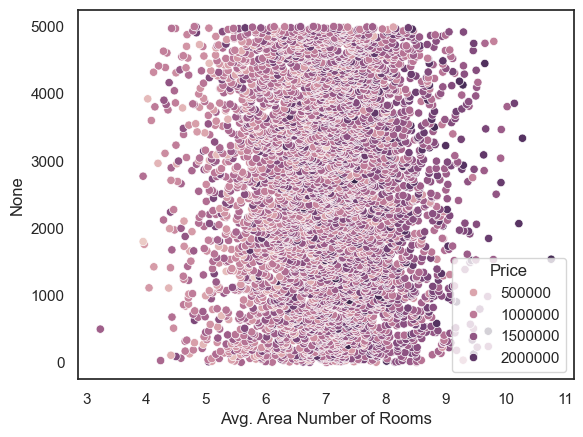

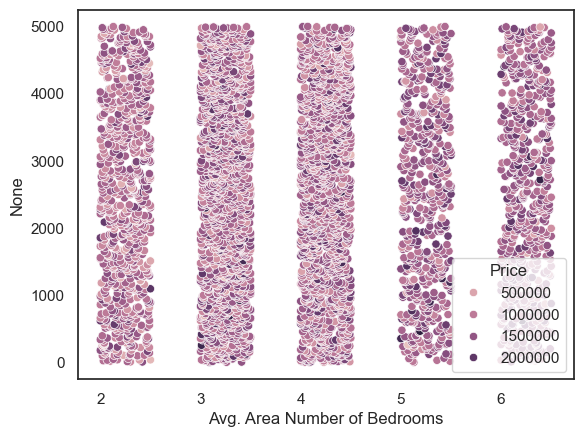

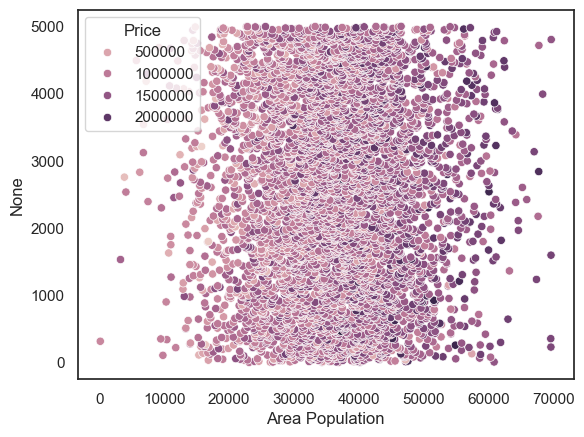

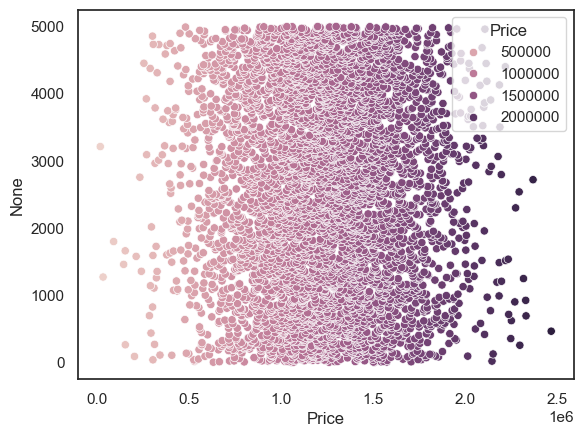

In [12]:
### Draw Scatter plot for numerical columns And analyse the distribution 
for column in dataset.columns :
    plt.figure()
    sns.scatterplot(data=dataset, x=column, y=dataset.index,hue=dataset.Price)

<Figure size 640x480 with 0 Axes>

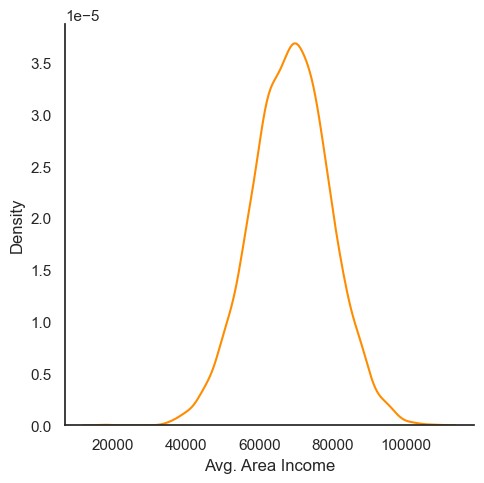

<Figure size 640x480 with 0 Axes>

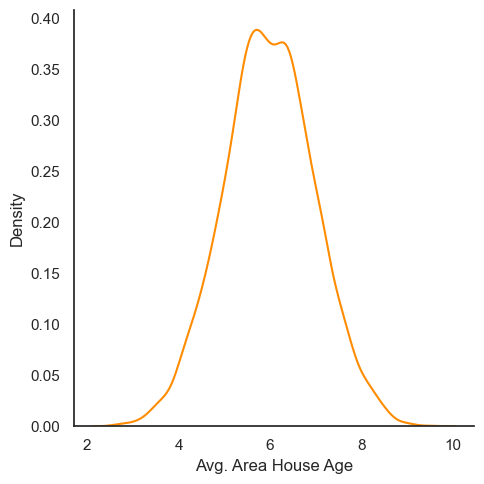

<Figure size 640x480 with 0 Axes>

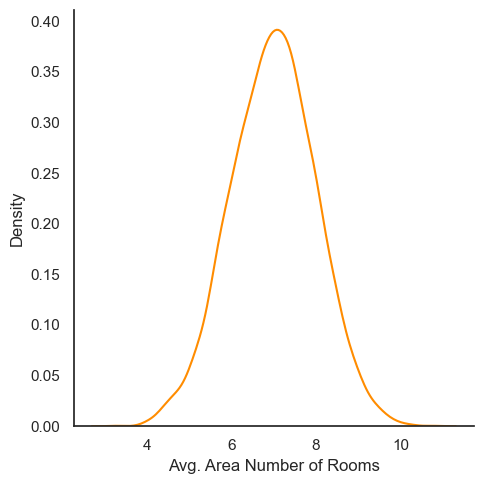

<Figure size 640x480 with 0 Axes>

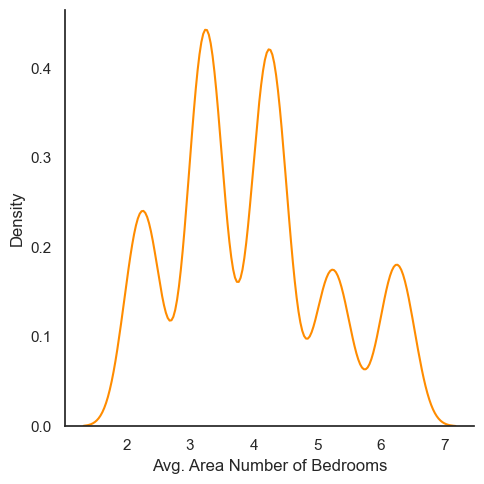

<Figure size 640x480 with 0 Axes>

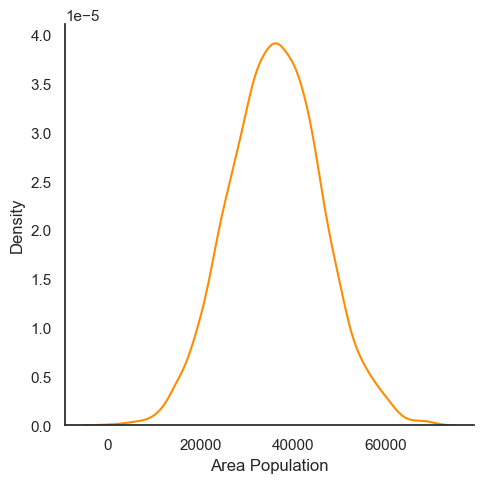

<Figure size 640x480 with 0 Axes>

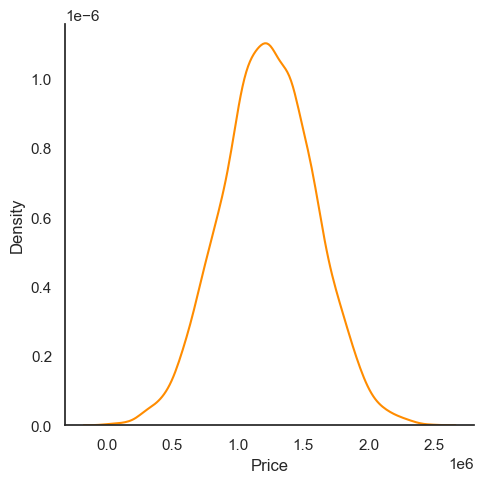

In [13]:
### Draw hist plot for numerical columns And analyse the distribution 
for column in dataset.columns :
    plt.figure()
    sns.displot(dataset[column],color='darkorange',kind='kde')
#     sns.displot(dataset[column], color='darkorange', kind='hist')
    
# Observation : Here we can see other than column 'Avg. Area Number of Bedrooms' 
# all columns seems to be Normally/Gaussian/Symetrically distributed.

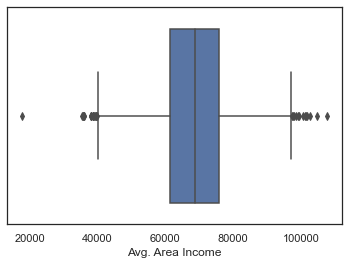

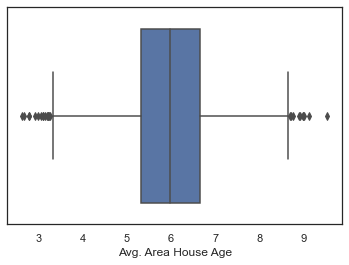

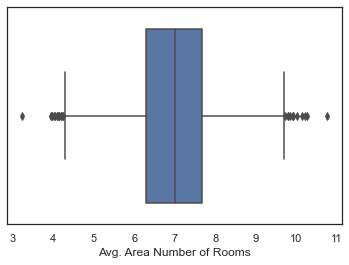

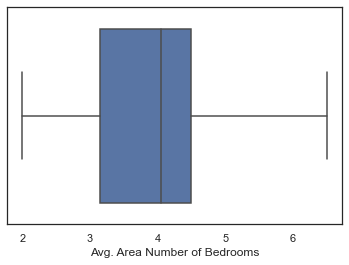

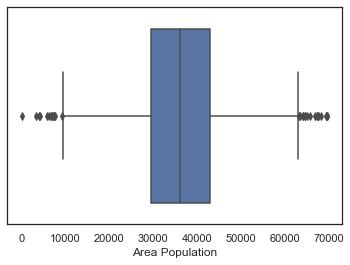

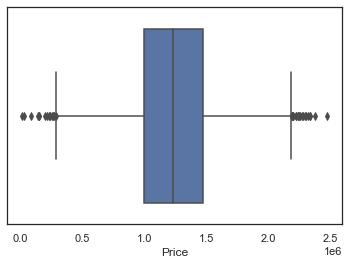

In [12]:
### Draw box plot 
# Identify Outliers  for numerical columns. It represents the five-point summary. 
for column in dataset.columns :
    plt.figure()
    sns.boxplot(x = dataset[column], data = dataset, hue=column)
    
# Observation : There are outliers in columns 'Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
#  'Avg. Area Number of Bedrooms', 'Area Population' and 'Price'

### Bi-virate analysis

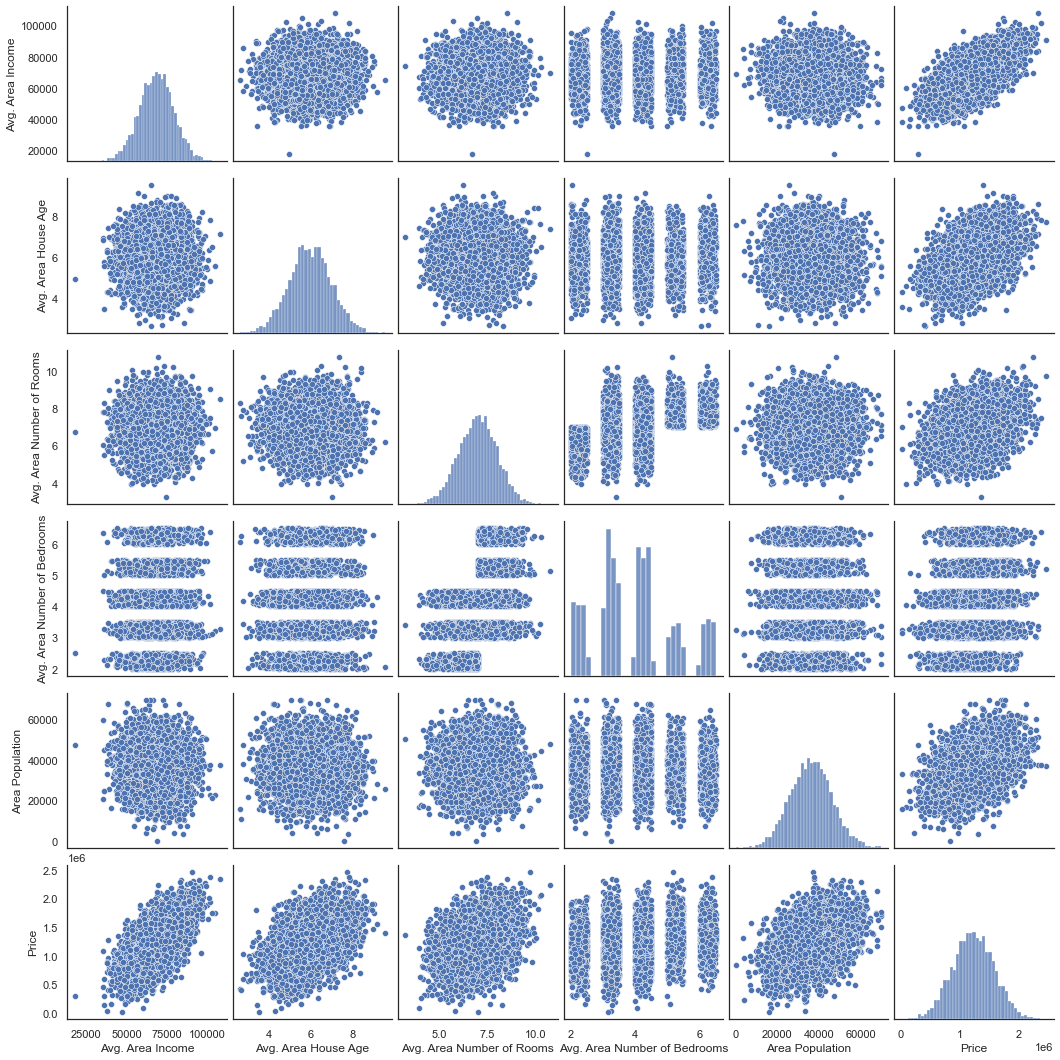

In [13]:
# Visualize relation with each independend and dependent variable
sns.pairplot(data=dataset)

In [14]:
# Calculate co-relation
corr = dataset.corr()
corr

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.001797,-0.010304,0.019393,-0.016212,0.639749
Avg. Area House Age,-0.001797,1.000000,-0.009254,0.006640,-0.018743,0.452543
Avg. Area Number of Rooms,-0.010304,-0.009254,1.000000,0.463203,0.001129,0.335392
Avg. Area Number of Bedrooms,0.019393,0.006640,0.463203,1.000000,-0.022125,0.171386
Area Population,-0.016212,-0.018743,0.001129,-0.022125,1.000000,0.408556
Price,0.639749,0.452543,0.335392,0.171386,0.408556,1.000000


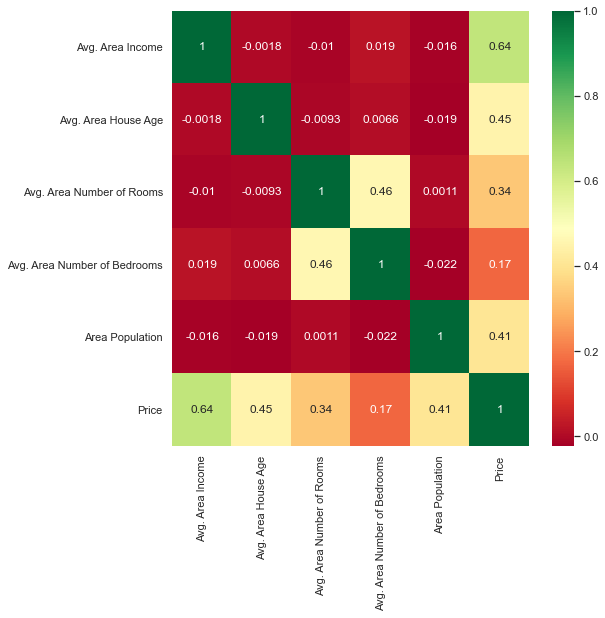

In [15]:
# plot co-relation in heat map to check multi-co-linearility between features
plt.subplots(figsize=(8,8))
sns.heatmap(corr,cmap= 'RdYlGn',annot=True)
plt.show()

### Pre-processing

In [16]:
# Check Skewness and Kurtosisto check if data require scaling/transformation or not.

skew = dataset.skew()
print("\nSkew\n")
print(skew)

print("\nKurt\n")
kurt = dataset.kurt()
print(kurt)

# Observation : Skew and Kurt values are in range -3 to 3 then no need to have a transformation.


Skew

Avg. Area Income               -0.030046
Avg. Area House Age            -0.007214
Avg. Area Number of Rooms      -0.041172
Avg. Area Number of Bedrooms    0.375705
Area Population                 0.050650
Price                          -0.002718
dtype: float64

Kurt

Avg. Area Income                0.044657
Avg. Area House Age            -0.083437
Avg. Area Number of Rooms      -0.073837
Avg. Area Number of Bedrooms   -0.702992
Area Population                -0.006733
Price                          -0.054918
dtype: float64


In [17]:
# Outlier Removal : Z-Score method
# We will use z-score method to remove outliers as in univirate analysis we have seen our data is uniformally distributed
print('Before outlier removal : ',dataset.shape)
# cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population', 'Price']
z = np.abs(zscore(dataset, axis = 1))
threshold = 3
# print(np.where(z>threshold))
dataset = dataset[(z < threshold).all(axis=1)]
print('After Z-Score approach : ',dataset.shape)

# As we have Avg. Area Number of Bedrooms column is not normally distributed then let's use IQR method for outlier removal
# cols = ['Avg. Area Number of Bedrooms']
# Q1 = dataset.quantile(0.25)  # Q1
# Q3 = dataset.quantile(0.75)  # Q3
# IQR = Q3-Q1
# dataset = dataset[~((dataset<(Q1-1.5*IQR)) | (dataset>(Q3+1.5*IQR)))]
# print('After IQR approach : ',dataset.shape)

Before outlier removal :  (5000, 6)
After Z-Score approach :  (4987, 6)


In [18]:
# Handling missing value 
# Let's impute missing values of column Avg. Area Income, Avg. Area Number of Rooms and Avg. Area Number of Bedrooms

dataset['Avg. Area Income'] = dataset['Avg. Area Income'].fillna(dataset['Avg. Area Income'].median())
dataset['Avg. Area Number of Rooms'] = dataset['Avg. Area Number of Rooms'].fillna(dataset['Avg. Area Number of Rooms'].mean())
dataset['Avg. Area Number of Bedrooms'] = dataset['Avg. Area Number of Bedrooms'].fillna(dataset['Avg. Area Number of Bedrooms'].mean())

# dataset['Avg. Area House Age'] = dataset['Avg. Area House Age'].fillna(dataset['Avg. Area House Age'].mean())
# dataset['Area Population'] = dataset['Area Population'].fillna(dataset['Area Population'].mean())
# dataset['Price'] = dataset['Price'].fillna(dataset['Price'].mean())


<ipython-input-18-2a45d16de970>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Avg. Area Income'] = dataset['Avg. Area Income'].fillna(dataset['Avg. Area Income'].median())
<ipython-input-18-2a45d16de970>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Avg. Area Number of Rooms'] = dataset['Avg. Area Number of Rooms'].fillna(dataset['Avg. Area Number of Rooms'].mean())
<ipython-input-18-2a45d16de970>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [19]:
# Now we do no have any missing values
dataset.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

In [20]:
# Prepare data for train and test, first drop dependent variable
x = dataset.drop(columns=['Price'])
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.45857,5.682861,7.009188,4.09,23086.80050
1,79248.64245,6.002900,6.730821,3.09,40173.07217
2,61287.06718,5.865890,8.512727,5.13,36882.15940
3,63345.24005,7.188236,5.586729,3.26,34310.24283
4,59982.19723,5.040555,7.839388,4.23,26354.10947
...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103
4996,78491.27543,6.999135,6.576763,4.02,25616.11549
4997,63390.68689,7.250591,4.805081,2.13,33266.14549
4998,68001.33124,5.534388,7.130144,5.44,42625.62016


In [21]:
# Get dependent variable from  dataframe
y = dataset['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4987, dtype: float64

###                                                                    ------------ END ------------